# 1. Importing the necessary libraries

In [1]:
import numpy as np 
import pandas as pd 

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# sklearn 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Other imports
from collections import Counter
import requests
import re
from nltk.corpus import stopwords
import string
import nltk

#import imageio
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, '/Users/patri/Documents/AllWomen/Module_0/_functions_')

from fx_NLP import *

# 2. Loading the datasets and understanding them

In [2]:
tweets = pd.read_csv('final_sustainability_tweets.csv')

In [3]:
tweets.head()

,Unnamed: 0.1,Unnamed: 0,_type,url,date,content,renderedContent,id,user,replyCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,0,snscrape.modules.twitter.Tweet,https://twitter.com/natasham4/status/158723225...,2022-10-31 23:57:14+00:00,Renewable Natural Gas is integral to UPS’s str...,Renewable Natural Gas is integral to UPS’s str...,1587232258800467973,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sustainability', 'susty']",NaN
1,1,1,snscrape.modules.twitter.Tweet,https://twitter.com/all_ecofriendly/status/158...,2022-10-31 23:56:28+00:00,🤔 🤔🤔 Curious about eco-friendly products? 🌿🐼🐾...,🤔 🤔🤔 Curious about eco-friendly products? 🌿🐼🐾...,1587232064507715585,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['plasticfree', 'savetheplanet', 'sustainabili...",NaN
2,2,2,snscrape.modules.twitter.Tweet,https://twitter.com/baxterkb/status/1587229272...,2022-10-31 23:45:22+00:00,Most data center operators aren’t tracking key...,Most data center operators aren’t tracking key...,1587229272179355648,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sustainability', 'ClimateCrisis']",NaN
3,3,3,snscrape.modules.twitter.Tweet,https://twitter.com/SvenVanZanten01/status/158...,2022-10-31 23:45:02+00:00,Sven van Zanten Shares.\n\n#svenvanzanten #sol...,Sven van Zanten Shares.\n\n#svenvanzanten #sol...,1587229190641913857,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,...,NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,"['svenvanzanten', 'solar', 'renewables', 'clim...",NaN
4,4,4,snscrape.modules.twitter.Tweet,https://twitter.com/Ing_Martin_V/status/158722...,2022-10-31 23:44:37+00:00,Recycling key to solar sustainability https://...,Recycling key to solar sustainability pv-magaz...,1587229083133517826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,...,NaN,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['Energy', 'GreenTech', 'CleanEnergy', 'Energy...",NaN


In [4]:
tweets.shape

(10000, 30)

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      10000 non-null  int64  
 1   Unnamed: 0        10000 non-null  int64  
 2   _type             10000 non-null  object 
 3   url               10000 non-null  object 
 4   date              10000 non-null  object 
 5   content           10000 non-null  object 
 6   renderedContent   10000 non-null  object 
 7   id                10000 non-null  int64  
 8   user              10000 non-null  object 
 9   replyCount        10000 non-null  int64  
 10  retweetCount      10000 non-null  int64  
 11  likeCount         10000 non-null  int64  
 12  quoteCount        10000 non-null  int64  
 13  conversationId    10000 non-null  int64  
 14  lang              10000 non-null  object 
 15  source            10000 non-null  object 
 16  sourceUrl         10000 non-null  object 

In [6]:
tweets.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '_type', 'url', 'date', 'content',
       'renderedContent', 'id', 'user', 'replyCount', 'retweetCount',
       'likeCount', 'quoteCount', 'conversationId', 'lang', 'source',
       'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks', 'media',
       'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser',
       'mentionedUsers', 'coordinates', 'place', 'hashtags', 'cashtags'],
      dtype='object')

# 3. EDA and Data Cleaning

In [7]:
tweets["date"]

0       2022-10-31 23:57:14+00:00
1       2022-10-31 23:56:28+00:00
2       2022-10-31 23:45:22+00:00
3       2022-10-31 23:45:02+00:00
4       2022-10-31 23:44:37+00:00
                  ...            
9995    2018-10-30 21:10:07+00:00
9996    2018-10-30 21:09:25+00:00
9997    2018-10-30 21:08:04+00:00
9998    2018-10-30 21:07:55+00:00
9999    2018-10-30 21:07:33+00:00
Name: date, Length: 10000, dtype: object

In [8]:
tweets = tweets[['content', 'lang', 'place', 'hashtags', 'date']]

In [9]:
tweets

,content,lang,place,hashtags,date
0,Renewable Natural Gas is integral to UPS’s str...,en,NaN,"['sustainability', 'susty']",2022-10-31 23:57:14+00:00
1,🤔 🤔🤔 Curious about eco-friendly products? 🌿🐼🐾...,en,NaN,"['plasticfree', 'savetheplanet', 'sustainabili...",2022-10-31 23:56:28+00:00
2,Most data center operators aren’t tracking key...,en,NaN,"['sustainability', 'ClimateCrisis']",2022-10-31 23:45:22+00:00
3,Sven van Zanten Shares.\n\n#svenvanzanten #sol...,nl,NaN,"['svenvanzanten', 'solar', 'renewables', 'clim...",2022-10-31 23:45:02+00:00
4,Recycling key to solar sustainability https://...,en,NaN,"['Energy', 'GreenTech', 'CleanEnergy', 'Energy...",2022-10-31 23:44:37+00:00
...,...,...,...,...,...
9995,Small changes to your daily routine can make a...,en,NaN,"['sustainability', 'sustainableliving', 'sayno...",2018-10-30 21:10:07+00:00
9996,I keep an eye out on the demand for BIM in ten...,en,NaN,"['buildingcontrol', 'Sustainability']",2018-10-30 21:09:25+00:00
9997,Applicable everywhere; any university; any ins...,en,NaN,"['sustainability', 'LetsGoMontreal', 'NextGenL...",2018-10-30 21:08:04+00:00
9998,LeNS World Distributed Conference: Designing #...,en,NaN,"['Sustainability', 'India', 'Bangalore', 'desi...",2018-10-30 21:07:55+00:00


In [10]:
tweets = tweets[tweets["lang"] == 'en']

In [11]:
tweets.head(2)

,content,lang,place,hashtags,date
0,Renewable Natural Gas is integral to UPS’s str...,en,NaN,"['sustainability', 'susty']",2022-10-31 23:57:14+00:00
1,🤔 🤔🤔 Curious about eco-friendly products? 🌿🐼🐾...,en,NaN,"['plasticfree', 'savetheplanet', 'sustainabili...",2022-10-31 23:56:28+00:00


In [12]:
tweets.lang.unique()

array(['en'], dtype=object)

In [13]:
tweets.dtypes

content     object
lang        object
place       object
hashtags    object
date        object
dtype: object

In [14]:
tweets.place.isnull().sum()

8776

In [15]:
tweets = tweets.drop(['place'], axis= 1)

In [16]:
tweets

,content,lang,hashtags,date
0,Renewable Natural Gas is integral to UPS’s str...,en,"['sustainability', 'susty']",2022-10-31 23:57:14+00:00
1,🤔 🤔🤔 Curious about eco-friendly products? 🌿🐼🐾...,en,"['plasticfree', 'savetheplanet', 'sustainabili...",2022-10-31 23:56:28+00:00
2,Most data center operators aren’t tracking key...,en,"['sustainability', 'ClimateCrisis']",2022-10-31 23:45:22+00:00
4,Recycling key to solar sustainability https://...,en,"['Energy', 'GreenTech', 'CleanEnergy', 'Energy...",2022-10-31 23:44:37+00:00
6,#sustainability as one of our corporate values...,en,"['sustainability', 'DreamJob', 'TrailblazerRan...",2022-10-31 23:42:20+00:00
...,...,...,...,...
9995,Small changes to your daily routine can make a...,en,"['sustainability', 'sustainableliving', 'sayno...",2018-10-30 21:10:07+00:00
9996,I keep an eye out on the demand for BIM in ten...,en,"['buildingcontrol', 'Sustainability']",2018-10-30 21:09:25+00:00
9997,Applicable everywhere; any university; any ins...,en,"['sustainability', 'LetsGoMontreal', 'NextGenL...",2018-10-30 21:08:04+00:00
9998,LeNS World Distributed Conference: Designing #...,en,"['Sustainability', 'India', 'Bangalore', 'desi...",2018-10-30 21:07:55+00:00


### Converting the variable date into datetime

In [17]:
tweets['date'] = pd.to_datetime(tweets['date'])

In [18]:
tweets

,content,lang,hashtags,date
0,Renewable Natural Gas is integral to UPS’s str...,en,"['sustainability', 'susty']",2022-10-31 23:57:14+00:00
1,🤔 🤔🤔 Curious about eco-friendly products? 🌿🐼🐾...,en,"['plasticfree', 'savetheplanet', 'sustainabili...",2022-10-31 23:56:28+00:00
2,Most data center operators aren’t tracking key...,en,"['sustainability', 'ClimateCrisis']",2022-10-31 23:45:22+00:00
4,Recycling key to solar sustainability https://...,en,"['Energy', 'GreenTech', 'CleanEnergy', 'Energy...",2022-10-31 23:44:37+00:00
6,#sustainability as one of our corporate values...,en,"['sustainability', 'DreamJob', 'TrailblazerRan...",2022-10-31 23:42:20+00:00
...,...,...,...,...
9995,Small changes to your daily routine can make a...,en,"['sustainability', 'sustainableliving', 'sayno...",2018-10-30 21:10:07+00:00
9996,I keep an eye out on the demand for BIM in ten...,en,"['buildingcontrol', 'Sustainability']",2018-10-30 21:09:25+00:00
9997,Applicable everywhere; any university; any ins...,en,"['sustainability', 'LetsGoMontreal', 'NextGenL...",2018-10-30 21:08:04+00:00
9998,LeNS World Distributed Conference: Designing #...,en,"['Sustainability', 'India', 'Bangalore', 'desi...",2018-10-30 21:07:55+00:00


In [19]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9095 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   content   9095 non-null   object             
 1   lang      9095 non-null   object             
 2   hashtags  9094 non-null   object             
 3   date      9095 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 355.3+ KB


In [20]:
tweets['year'] = tweets['date'].dt.year

In [21]:
tweets

,content,lang,hashtags,date,year
0,Renewable Natural Gas is integral to UPS’s str...,en,"['sustainability', 'susty']",2022-10-31 23:57:14+00:00,2022
1,🤔 🤔🤔 Curious about eco-friendly products? 🌿🐼🐾...,en,"['plasticfree', 'savetheplanet', 'sustainabili...",2022-10-31 23:56:28+00:00,2022
2,Most data center operators aren’t tracking key...,en,"['sustainability', 'ClimateCrisis']",2022-10-31 23:45:22+00:00,2022
4,Recycling key to solar sustainability https://...,en,"['Energy', 'GreenTech', 'CleanEnergy', 'Energy...",2022-10-31 23:44:37+00:00,2022
6,#sustainability as one of our corporate values...,en,"['sustainability', 'DreamJob', 'TrailblazerRan...",2022-10-31 23:42:20+00:00,2022
...,...,...,...,...,...
9995,Small changes to your daily routine can make a...,en,"['sustainability', 'sustainableliving', 'sayno...",2018-10-30 21:10:07+00:00,2018
9996,I keep an eye out on the demand for BIM in ten...,en,"['buildingcontrol', 'Sustainability']",2018-10-30 21:09:25+00:00,2018
9997,Applicable everywhere; any university; any ins...,en,"['sustainability', 'LetsGoMontreal', 'NextGenL...",2018-10-30 21:08:04+00:00,2018
9998,LeNS World Distributed Conference: Designing #...,en,"['Sustainability', 'India', 'Bangalore', 'desi...",2018-10-30 21:07:55+00:00,2018


## NLP preprocessing - content

In [22]:
tweets['clean'] = tweets['content'].apply(lambda x: clean_text(x))

In [23]:
tweets

,content,lang,hashtags,date,year,clean
0,Renewable Natural Gas is integral to UPS’s str...,en,"['sustainability', 'susty']",2022-10-31 23:57:14+00:00,2022,renewable natural gas is integral to ups’s str...
1,🤔 🤔🤔 Curious about eco-friendly products? 🌿🐼🐾...,en,"['plasticfree', 'savetheplanet', 'sustainabili...",2022-10-31 23:56:28+00:00,2022,🤔 🤔🤔 curious about ecofriendly products 🌿🐼🐾 w...
2,Most data center operators aren’t tracking key...,en,"['sustainability', 'ClimateCrisis']",2022-10-31 23:45:22+00:00,2022,most data center operators aren’t tracking key...
4,Recycling key to solar sustainability https://...,en,"['Energy', 'GreenTech', 'CleanEnergy', 'Energy...",2022-10-31 23:44:37+00:00,2022,recycling key to solar sustainability via pvm...
6,#sustainability as one of our corporate values...,en,"['sustainability', 'DreamJob', 'TrailblazerRan...",2022-10-31 23:42:20+00:00,2022,sustainability as one of our corporate values ...
...,...,...,...,...,...,...
9995,Small changes to your daily routine can make a...,en,"['sustainability', 'sustainableliving', 'sayno...",2018-10-30 21:10:07+00:00,2018,small changes to your daily routine can make a...
9996,I keep an eye out on the demand for BIM in ten...,en,"['buildingcontrol', 'Sustainability']",2018-10-30 21:09:25+00:00,2018,i keep an eye out on the demand for bim in ten...
9997,Applicable everywhere; any university; any ins...,en,"['sustainability', 'LetsGoMontreal', 'NextGenL...",2018-10-30 21:08:04+00:00,2018,applicable everywhere any university any insti...
9998,LeNS World Distributed Conference: Designing #...,en,"['Sustainability', 'India', 'Bangalore', 'desi...",2018-10-30 21:07:55+00:00,2018,lens world distributed conference designing su...


In [24]:
#tweets['clean'] = tweets['clean'].apply(lambda x : text_preprocessing(x, 'english'))

In [25]:
# all_words_clean = tweets['clean'].str.split(expand=True).unstack().value_counts()

In [26]:
#import plotly.express as px
#px.bar(all_words_clean, x = all_words_clean.index[:20],
#      y = all_words_clean.values[:20], 
#      color = all_words_clean.values[:20],
#      title = 'Top 20 word frequencies in the dataset',
#      labels=dict(x='Words', y='Frequency')) # Give some label on the different axes

In [27]:
list_words = ["sustainability", "’", "amp", "sustainable", "new", "us", "iot", "halloween", "esg", "via", "sdg", "“", "”"]

In [28]:
tweets

,content,lang,hashtags,date,year,clean
0,Renewable Natural Gas is integral to UPS’s str...,en,"['sustainability', 'susty']",2022-10-31 23:57:14+00:00,2022,renewable natural gas is integral to ups’s str...
1,🤔 🤔🤔 Curious about eco-friendly products? 🌿🐼🐾...,en,"['plasticfree', 'savetheplanet', 'sustainabili...",2022-10-31 23:56:28+00:00,2022,🤔 🤔🤔 curious about ecofriendly products 🌿🐼🐾 w...
2,Most data center operators aren’t tracking key...,en,"['sustainability', 'ClimateCrisis']",2022-10-31 23:45:22+00:00,2022,most data center operators aren’t tracking key...
4,Recycling key to solar sustainability https://...,en,"['Energy', 'GreenTech', 'CleanEnergy', 'Energy...",2022-10-31 23:44:37+00:00,2022,recycling key to solar sustainability via pvm...
6,#sustainability as one of our corporate values...,en,"['sustainability', 'DreamJob', 'TrailblazerRan...",2022-10-31 23:42:20+00:00,2022,sustainability as one of our corporate values ...
...,...,...,...,...,...,...
9995,Small changes to your daily routine can make a...,en,"['sustainability', 'sustainableliving', 'sayno...",2018-10-30 21:10:07+00:00,2018,small changes to your daily routine can make a...
9996,I keep an eye out on the demand for BIM in ten...,en,"['buildingcontrol', 'Sustainability']",2018-10-30 21:09:25+00:00,2018,i keep an eye out on the demand for bim in ten...
9997,Applicable everywhere; any university; any ins...,en,"['sustainability', 'LetsGoMontreal', 'NextGenL...",2018-10-30 21:08:04+00:00,2018,applicable everywhere any university any insti...
9998,LeNS World Distributed Conference: Designing #...,en,"['Sustainability', 'India', 'Bangalore', 'desi...",2018-10-30 21:07:55+00:00,2018,lens world distributed conference designing su...


In [29]:
def text_preprocessing_updated(text, list_words):
    """
    Cleaning and parsing the text.
    """
  # 1. Data cleaning on the text variable
    nopunc = clean_text(text)
    
    # 2. Tokenize the cleaned_text
    tokenizer = TweetTokenizer()
    nopunc = tokenizer.tokenize(nopunc)

    # 3. Update the stop_words

    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(list_words)
    
    
    remove_stopwords = [w for w in nopunc if w not in stop_words]
    combined_text = ' '.join(remove_stopwords)
    return combined_text


In [30]:
tweets['clean'] = tweets['clean'].apply(lambda x: text_preprocessing_updated(x, list_words))

In [31]:
tweets

,content,lang,hashtags,date,year,clean
0,Renewable Natural Gas is integral to UPS’s str...,en,"['sustainability', 'susty']",2022-10-31 23:57:14+00:00,2022,renewable natural gas integral ups strategy re...
1,🤔 🤔🤔 Curious about eco-friendly products? 🌿🐼🐾...,en,"['plasticfree', 'savetheplanet', 'sustainabili...",2022-10-31 23:56:28+00:00,2022,🤔 🤔 🤔 curious ecofriendly products 🌿 🐼 🐾 want ...
2,Most data center operators aren’t tracking key...,en,"['sustainability', 'ClimateCrisis']",2022-10-31 23:45:22+00:00,2022,data center operators tracking key metrics tra...
4,Recycling key to solar sustainability https://...,en,"['Energy', 'GreenTech', 'CleanEnergy', 'Energy...",2022-10-31 23:44:37+00:00,2022,recycling key solar pvmagazine energy greentec...
6,#sustainability as one of our corporate values...,en,"['sustainability', 'DreamJob', 'TrailblazerRan...",2022-10-31 23:42:20+00:00,2022,one corporate values comes mindwe sustain jewe...
...,...,...,...,...,...,...
9995,Small changes to your daily routine can make a...,en,"['sustainability', 'sustainableliving', 'sayno...",2018-10-30 21:10:07+00:00,2018,small changes daily routine make massive diffe...
9996,I keep an eye out on the demand for BIM in ten...,en,"['buildingcontrol', 'Sustainability']",2018-10-30 21:09:25+00:00,2018,keep eye demand bim tenders observation would ...
9997,Applicable everywhere; any university; any ins...,en,"['sustainability', 'LetsGoMontreal', 'NextGenL...",2018-10-30 21:08:04+00:00,2018,applicable everywhere university institution c...
9998,LeNS World Distributed Conference: Designing #...,en,"['Sustainability', 'India', 'Bangalore', 'desi...",2018-10-30 21:07:55+00:00,2018,lens world distributed conference designing in...


In [32]:
from nltk.tokenize import word_tokenize

In [33]:
tweets['text_tokens'] = tweets['clean'].apply(lambda x: word_tokenize(x))

In [34]:
tweets

,content,lang,hashtags,date,year,clean,text_tokens
0,Renewable Natural Gas is integral to UPS’s str...,en,"['sustainability', 'susty']",2022-10-31 23:57:14+00:00,2022,renewable natural gas integral ups strategy re...,"[renewable, natural, gas, integral, ups, strat..."
1,🤔 🤔🤔 Curious about eco-friendly products? 🌿🐼🐾...,en,"['plasticfree', 'savetheplanet', 'sustainabili...",2022-10-31 23:56:28+00:00,2022,🤔 🤔 🤔 curious ecofriendly products 🌿 🐼 🐾 want ...,"[🤔, 🤔, 🤔, curious, ecofriendly, products, 🌿, 🐼..."
2,Most data center operators aren’t tracking key...,en,"['sustainability', 'ClimateCrisis']",2022-10-31 23:45:22+00:00,2022,data center operators tracking key metrics tra...,"[data, center, operators, tracking, key, metri..."
4,Recycling key to solar sustainability https://...,en,"['Energy', 'GreenTech', 'CleanEnergy', 'Energy...",2022-10-31 23:44:37+00:00,2022,recycling key solar pvmagazine energy greentec...,"[recycling, key, solar, pvmagazine, energy, gr..."
6,#sustainability as one of our corporate values...,en,"['sustainability', 'DreamJob', 'TrailblazerRan...",2022-10-31 23:42:20+00:00,2022,one corporate values comes mindwe sustain jewe...,"[one, corporate, values, comes, mindwe, sustai..."
...,...,...,...,...,...,...,...
9995,Small changes to your daily routine can make a...,en,"['sustainability', 'sustainableliving', 'sayno...",2018-10-30 21:10:07+00:00,2018,small changes daily routine make massive diffe...,"[small, changes, daily, routine, make, massive..."
9996,I keep an eye out on the demand for BIM in ten...,en,"['buildingcontrol', 'Sustainability']",2018-10-30 21:09:25+00:00,2018,keep eye demand bim tenders observation would ...,"[keep, eye, demand, bim, tenders, observation,..."
9997,Applicable everywhere; any university; any ins...,en,"['sustainability', 'LetsGoMontreal', 'NextGenL...",2018-10-30 21:08:04+00:00,2018,applicable everywhere university institution c...,"[applicable, everywhere, university, instituti..."
9998,LeNS World Distributed Conference: Designing #...,en,"['Sustainability', 'India', 'Bangalore', 'desi...",2018-10-30 21:07:55+00:00,2018,lens world distributed conference designing in...,"[lens, world, distributed, conference, designi..."


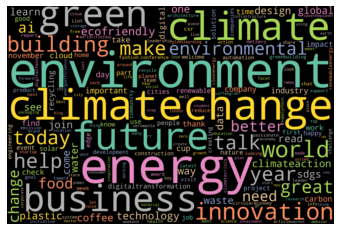

In [35]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False,).generate(" ".join(tweets["clean"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4. Topic Modelling

In [36]:
import gensim
from gensim import corpora

In [37]:
dictionary = corpora.Dictionary(tweets['text_tokens'])

In [38]:
print(dictionary.token2id)

{'affordable': 0, 'carbon': 1, 'clean': 2, 'fuel': 3, 'gas': 4, 'goals': 5, 'heavyduty': 6, 'include': 7, 'integral': 8, 'natural': 9, 'neutrality': 10, 'powers': 11, 'reach': 12, 'reliable': 13, 'renewable': 14, 'rng': 15, 'strategy': 16, 'susty': 17, 'ups': 18, 'vehicles': 19, 'wastederived': 20, 'buy': 21, 'curious': 22, 'difference': 23, 'dont': 24, 'ecofriendly': 25, 'gt': 26, 'make': 27, 'one': 28, 'part': 29, 'plasticfree': 30, 'problem': 31, 'products': 32, 'savetheplanet': 33, 'solution': 34, 'want': 35, 'zerowaste': 36, '—': 37, '⚡': 38, '✅': 39, '🌌': 40, '🌿': 41, '🐼': 42, '🐾': 43, '💃': 44, '💚': 45, '💩': 46, '📴': 47, '🕺': 48, '😺': 49, '🤔': 50, 'center': 51, 'climatecrisis': 52, 'cycles': 53, 'data': 54, 'emissions': 55, 'equipment': 56, 'ewaste': 57, 'itdata': 58, 'key': 59, 'life': 60, 'metrics': 61, 'operators': 62, 'server': 63, 'track': 64, 'tracking': 65, 'use': 66, 'utilization': 67, 'water': 68, 'cleanenergy': 69, 'energy': 70, 'energytransition': 71, 'greenenergy': 72

In [39]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tweets['text_tokens']]
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.

In [40]:
doc_term_matrix[15]

[(101, 1),
 (210, 1),
 (211, 1),
 (212, 1),
 (213, 1),
 (214, 1),
 (215, 1),
 (216, 1),
 (217, 1),
 (218, 1),
 (219, 1),
 (220, 1),
 (221, 1)]

In [41]:
for word_id, count in doc_term_matrix[11]:
    print(word_id,dictionary[word_id])
    print('--------')

69 cleanenergy
--------
70 energy
--------
150 news
--------
153 battery
--------
154 capacity
--------
155 cdwsocial
--------
156 great
--------
157 since
--------
158 tripled
--------
159 utilitydive
--------


In [58]:
#Create and fit the LDA model
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, 
               passes=20) #num of passes through the corpus during training.

# c) Extract word distributions for the optimized topics from LDA model



In [59]:
for i in ldamodel.print_topics():
    print('Topic number {} \n'.format(i[0]))
    for j in i: 
        print (j)
        print('......................')

Topic number 0 

0
......................
0.009*"environment" + 0.007*"waste" + 0.007*"plastic" + 0.006*"ecofriendly" + 0.006*"climatechange" + 0.005*"recycling" + 0.004*"green" + 0.004*"climateaction" + 0.004*"food" + 0.004*"happy"
......................
Topic number 1 

1
......................
0.013*"energy" + 0.007*"building" + 0.006*"design" + 0.005*"innovation" + 0.005*"technology" + 0.005*"company" + 0.005*"construction" + 0.005*"engineering" + 0.004*"november" + 0.004*"solar"
......................
Topic number 2 

2
......................
0.005*"⁦" + 0.004*"environment" + 0.004*"⁩" + 0.004*"take" + 0.004*"inspiration" + 0.004*"home" + 0.003*"weekend" + 0.003*"visit" + 0.003*"store" + 0.003*"climatechange"
......................
Topic number 3 

3
......................
0.012*"future" + 0.009*"better" + 0.009*"important" + 0.008*"business" + 0.007*"comes" + 0.007*"creating" + 0.006*"passionate" + 0.006*"facet" + 0.004*"today" + 0.004*"read"
......................
Topic number 4

### Topics of interest: AI, Green Building/Engineering, businesses, environment (waste, plastic, water, emissions), food, climate change, green energy, sustainability at home, recycling and future!

In [60]:
first_topic_words = dict(ldamodel.show_topic(0,1000))
second_topic_words = dict(ldamodel.show_topic(1,1000))
third_topic_words = dict(ldamodel.show_topic(2,1000))
fourth_topic_words = dict(ldamodel.show_topic(3,1000))
fifth_topic_words = dict(ldamodel.show_topic(4,1000))
#sixth_topic_words = dict(ldamodel.show_topic(5,1000))
#seventh_topic_words = dict(ldamodel.show_topic(6,1000))
#eight_topic_words = dict(ldamodel.show_topic(7,1000))
#ninth_topic_words = dict(ldamodel.show_topic(8,1000))
#tenth_topic_words = dict(ldamodel.show_topic(9,1000))

In [45]:
def visualize_wordcloud_dict_frequencies(dict_freqs, title, relative_scaling=0.5, max_words=100,
                                background_color='black'):
    plt.figure(figsize=(10, 10))
    wordcloud = WordCloud(width=900, height=500, max_words=max_words, relative_scaling=relative_scaling,
                          normalize_plurals=False, background_color=background_color).generate_from_frequencies(
        dict_freqs)
    plt.title(title)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

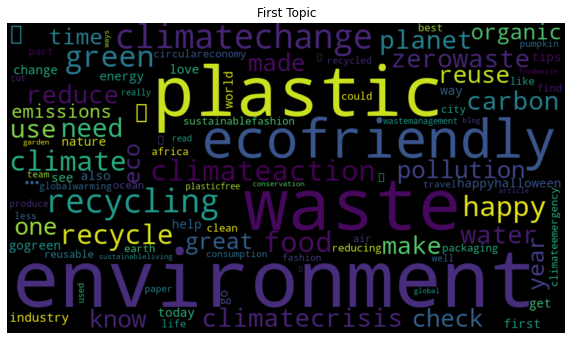

In [61]:
visualize_wordcloud_dict_frequencies(first_topic_words, "First Topic", relative_scaling=0.5, max_words=100,
                                background_color='black')

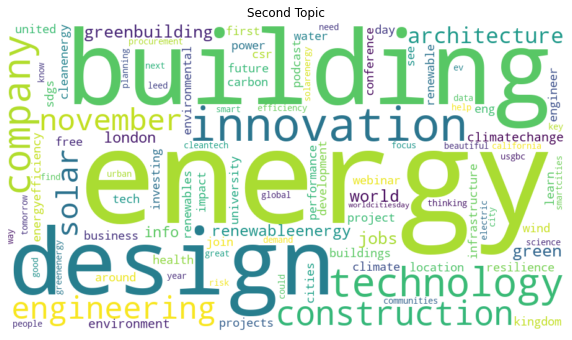

In [62]:
visualize_wordcloud_dict_frequencies(second_topic_words, "Second Topic", relative_scaling=0.5, max_words=100,
                                background_color='white')

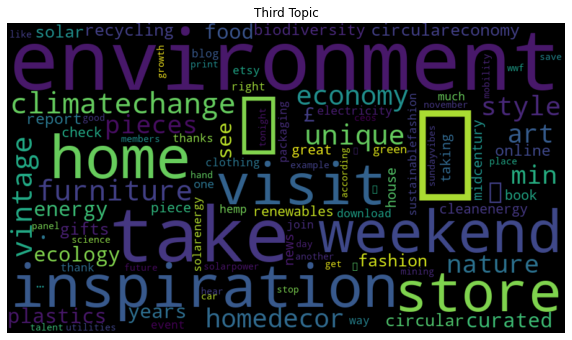

In [63]:
visualize_wordcloud_dict_frequencies(third_topic_words, "Third Topic", relative_scaling=0.5, max_words=100,
                                background_color='black')

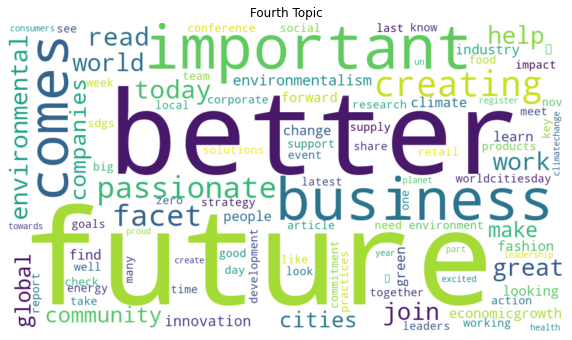

In [64]:
visualize_wordcloud_dict_frequencies(fourth_topic_words, "Fourth Topic", relative_scaling=0.5, max_words=100,
                                background_color='white')

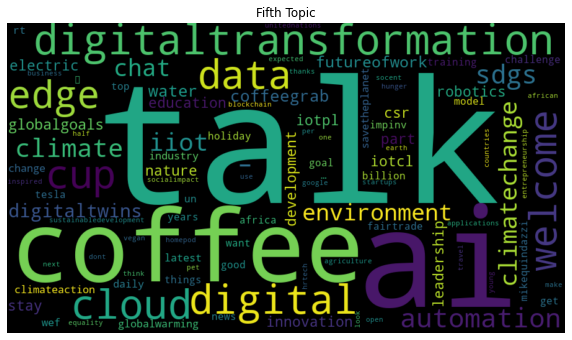

In [65]:
visualize_wordcloud_dict_frequencies(fifth_topic_words, "Fifth Topic", relative_scaling=0.5, max_words=100,
                                background_color='black')

In [69]:
#visualize_wordcloud_dict_frequencies(sixth_topic_words, "Sixth Topic", relative_scaling=0.5, max_words=100,
#                                background_color='white')

In [52]:
#visualize_wordcloud_dict_frequencies(seventh_topic_words, "Seventh Topic", relative_scaling=0.5, max_words=100,
#                                background_color='white')

In [53]:
#visualize_wordcloud_dict_frequencies(eight_topic_words, "Eighth Topic", relative_scaling=0.5, max_words=100,
#                                background_color='black')

In [54]:
#visualize_wordcloud_dict_frequencies(ninth_topic_words, "Ninth Topic", relative_scaling=0.5, max_words=100,
#                                background_color='white')

In [55]:
#visualize_wordcloud_dict_frequencies(tenth_topic_words, "Tenth Topic", relative_scaling=0.5, max_words=100,
#                                background_color='black')

In [67]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary)

/Users/patri/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/patri/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/patri/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/patri/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/patri/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are depreca

In [68]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.155186 -0.022040       1        1  27.463169
1      0.096867 -0.133116       2        1  23.268025
0      0.034010  0.159475       3        1  22.007352
2     -0.094987  0.104758       4        1  13.991123
4     -0.191075 -0.109077       5        1  13.270331, topic_info=             Term        Freq       Total Category  logprob  loglift
1684    important  338.000000  338.000000  Default  30.0000  30.0000
121          talk  193.000000  193.000000  Default  29.0000  29.0000
267        better  374.000000  374.000000  Default  28.0000  28.0000
85          comes  287.000000  287.000000  Default  27.0000  27.0000
2586     creating  285.000000  285.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
68          water   56.651088  243.679469   Topic5  -5.8234   0.5607
667     education   40.704141   99.707243   Topic5  -6.1540   1.1237
1406       nature   43.141539  152.505630   Topic5  -6.0958   0.7569
1193  development   40.950362  159.694518   Topic5  -6.1480   0.6587
198    innovation   41.780534  336.482961   Topic5  -6.1279  -0.0665

[314 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2359      4  0.938127    able
105       2  0.089232      ai
105       5  0.907196      ai
7846      3  0.987029  amazon
4171      1  0.974141   among
...     ...       ...     ...
257       2  0.054443       👉
257       3  0.119774       👉
257       5  0.032666       👉
294       3  0.974817       👻
470       3  0.995137       🔥

[516 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3, 5])